**Introduction**
The following document includes some cleaning of the TREES dataset from the FIA Datamart. The csv is too big to upload directly, but the zipped file is in the data folder


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style("whitegrid")

**Tree Health EDA** using WA_TREES

In [2]:
wa_tree_data = pd.read_csv("/Users/allierose/Downloads/WA_TREE.csv")

/var/folders/rd/2pn3c7gx2_9_cbdrsq0k0r6r0000gn/T/ipykernel_77651/3443904700.py:1: DtypeWarning: Columns (77,159) have mixed types. Specify dtype option on import or set low_memory=False.
  wa_tree_data = pd.read_csv("/Users/allierose/Downloads/WA_TREE.csv")


In [3]:
print(wa_tree_data.columns)
wa_tree_data.head(5)

Index(['CN', 'PLT_CN', 'PREV_TRE_CN', 'INVYR', 'STATECD', 'UNITCD', 'COUNTYCD',
       'PLOT', 'SUBP', 'TREE',
       ...
       'VOLCSNET_BARK', 'DRYBIO_STEM', 'DRYBIO_STEM_BARK', 'DRYBIO_STUMP_BARK',
       'DRYBIO_BOLE_BARK', 'DRYBIO_BRANCH', 'DRYBIO_FOLIAGE',
       'DRYBIO_SAWLOG_BARK', 'PREV_ACTUALHT_FLD', 'PREV_HT_FLD'],
      dtype='object', length=197)


,CN,PLT_CN,PREV_TRE_CN,INVYR,STATECD,UNITCD,COUNTYCD,PLOT,SUBP,TREE,...,VOLCSNET_BARK,DRYBIO_STEM,DRYBIO_STEM_BARK,DRYBIO_STUMP_BARK,DRYBIO_BOLE_BARK,DRYBIO_BRANCH,DRYBIO_FOLIAGE,DRYBIO_SAWLOG_BARK,PREV_ACTUALHT_FLD,PREV_HT_FLD
0,4871760,21864,NaN,2001,53,5,29,11,2,4871760,...,NaN,NaN,NaN,1.214989,20.690842,NaN,NaN,NaN,NaN,NaN
1,4871761,21864,NaN,2001,53,5,29,11,2,4871761,...,NaN,NaN,NaN,13.674053,343.282859,NaN,NaN,NaN,NaN,NaN
2,4879506,21864,NaN,2001,53,5,29,11,2,4879506,...,NaN,NaN,NaN,19.433360,738.157808,NaN,NaN,NaN,NaN,NaN
3,4871762,21865,NaN,2001,53,5,29,15,1,4871762,...,NaN,NaN,NaN,9.565398,204.506428,NaN,NaN,NaN,NaN,NaN
4,4871763,21865,NaN,2001,53,5,29,15,1,4871763,...,NaN,NaN,NaN,20.594949,530.372513,NaN,NaN,NaN,NaN,NaN


In [4]:
wa_tree_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504956 entries, 0 to 504955
Columns: 197 entries, CN to PREV_HT_FLD
dtypes: float64(180), int64(13), object(4)
memory usage: 758.9+ MB


**Crown Data** 

Let's look at the crown components since crown size is big component of tree health.<br>
'CR': compacted crown ratio( determined by dividing amount of tree bole supporting healthy foliage by actual tree length) <br>
'UNCRCD': uncompacted live crown ratio (determined by dividing the live crown length bythe actual tree length)<br>
'CPOSCD': crown position code (1 for superstory, 2 for overstory, 3 for understory, and 4 for open canopy)<br>
'CLIGHTCD': crown light exposure code (0 for no direct sunlight, 1-5 is full light light to top and/or various sides)<br>
'CVIGORCD': crown vigor code (looks at sapling crowns 1 - 3 where 1 is largest uncompacted live crown ratio)<br>
'CDENCD': crown density code ( 00, 05,10,15... up to 99 where each code repressents a percentage of density where density is the amount of things that block light visibility through the crown)<br>
'CDIEBKCD': crown dieback code ( code indicating amount of recent dead material in crown, same codes as CDENCD)<br>
'TRANSCD':foliage transparency code ( code indicating amount of light penetrating foliated portion of the crown, estimated in same percent classes as CDENCD)


In [7]:
print(f'Non-NA Count for CVIGORCD is {wa_tree_data['CVIGORCD'].count()}')
print(f'Non-NA Count for UNCRCD is {wa_tree_data['UNCRCD'].count()}')
print(f'Non-NA Count for CR is {wa_tree_data['CR'].count()}')
print(f'Non-NA Count for CPOSCD is {wa_tree_data['CPOSCD'].count()}')
print(f'Non-NA Count for CLIGHTCD is {wa_tree_data['CLIGHTCD'].count()}')
print(f'Non-NA Count for CDENCD is {wa_tree_data['CDENCD'].count()}')
print(f'Non-NA Count for CDIEBKCD is {wa_tree_data['CDIEBKCD'].count()}')
print(f'Non-NA Count for TRANSCD is {wa_tree_data['TRANSCD'].count()}')


Non-NA Count for CVIGORCD is 586
Non-NA Count for UNCRCD is 5524
Non-NA Count for CR is 390859
Non-NA Count for CPOSCD is 5524
Non-NA Count for CLIGHTCD is 5524
Non-NA Count for CDENCD is 4938
Non-NA Count for CDIEBKCD is 4938
Non-NA Count for TRANSCD is 4938


Not a lot of sapling data as expected (CVIGORCD). Not sure if we could use this

In [8]:
wa_tree_data_Crown=wa_tree_data.dropna(subset=['UNCRCD','CDENCD','TRANSCD','CLIGHTCD','CDIEBKCD','CR'])
wa_tree_data_Crown['CDENCD'].info()

<class 'pandas.core.series.Series'>
Index: 4938 entries, 14277 to 213832
Series name: CDENCD
Non-Null Count  Dtype  
--------------  -----  
4938 non-null   float64
dtypes: float64(1)
memory usage: 77.2 KB


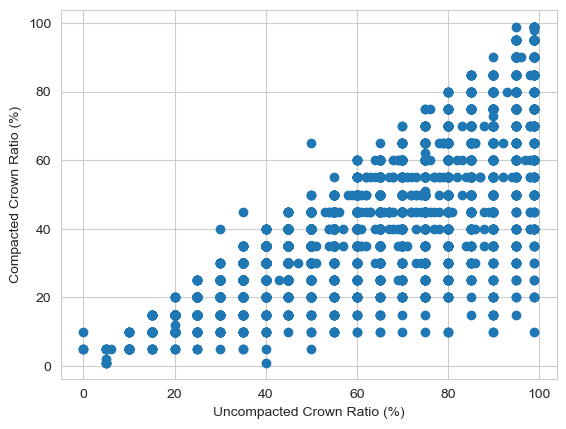

In [9]:
plt.scatter(wa_tree_data_Crown['UNCRCD'],wa_tree_data_Crown['CR'])
plt.xlabel('Uncompacted Crown Ratio (%)')
plt.ylabel('Compacted Crown Ratio (%)')

plt.show()

negative correlation between compacted and uncompacted crown ratios as expected

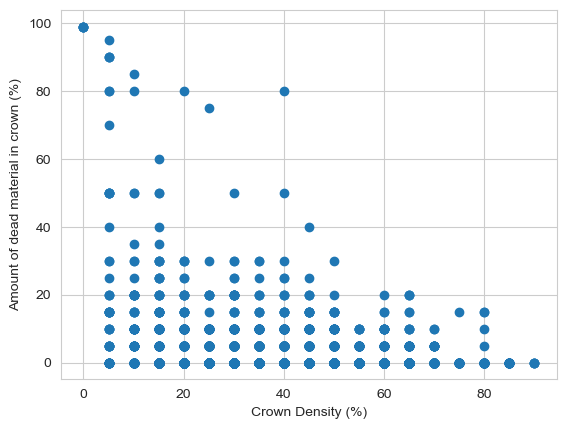

In [10]:
plt.scatter(wa_tree_data_Crown['CDENCD'],wa_tree_data_Crown['CDIEBKCD'])
plt.xlabel('Crown Density (%)')
plt.ylabel('Amount of dead material in crown (%)')

plt.show()

Interestingly, as crown density increases, the amount of dead material in crown decreases. Crown density is measured as the amount of things that block light such as crown branches,foliage, and reproductive structures.

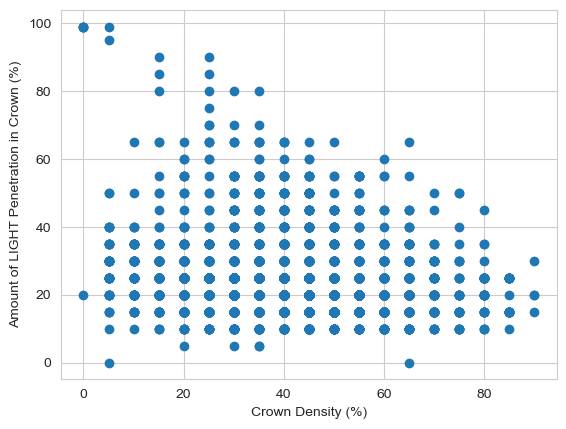

In [11]:
plt.scatter(wa_tree_data_Crown['CDENCD'],wa_tree_data_Crown['TRANSCD'])
plt.xlabel('Crown Density (%)')
plt.ylabel('Amount of LIGHT Penetration in Crown (%)')

plt.show()

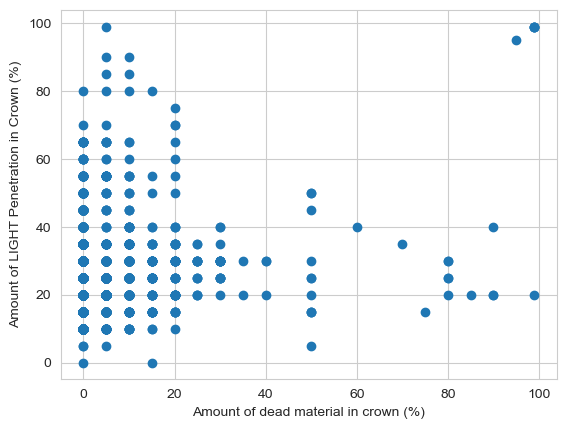

In [12]:
plt.scatter(wa_tree_data_Crown['CDIEBKCD'],wa_tree_data_Crown['TRANSCD'])
plt.xlabel('Amount of dead material in crown (%)')
plt.ylabel('Amount of LIGHT Penetration in Crown (%)')

plt.show()

**Damage Data** 

'Cull': rotten and missing cull (percent of the cubic foot volume in a live or dead tally tree that is rotten or missing) <br>
'DecayCD': Decay class code (code indicating stage of decay in a standing dead tree) <br>
There are also columns for first degree damage and secondary damage. <br>
'DAMLOC1': code indicating where damage is present on tree, 0-9 where 0 is no damage and 9 is foliage damage (ref field guide for how decide if there is damage) <br>
'DAMTYP1': code indicating kind of damage present(01 to 31)<br>
'DAMSEV1': code indicating how much of tree is affected, 0 to 9 where 0 is 1-9% affected, and 9 is 90 to 99% affected<br>
'DAMLOC2': "" but for secondary damage<br>
'DAMTYP2':<br>
'DAMSEV2':<br>

In [6]:
print(f'Non-NA Count for CULL is {wa_tree_data['CULL'].count()}')
print(f'Non-NA Count for DECAYCD is {wa_tree_data['DECAYCD'].count()}')
print(f'Non-NA Count for DAMLOC1 is {wa_tree_data['DAMLOC1'].count()}')
print(f'Non-NA Count for DAMTYP1 is {wa_tree_data['DAMTYP1'].count()}')
print(f'Non-NA Count for DAMSEV1 is {wa_tree_data['DAMSEV1'].count()}')
print(f'Non-NA Count for DAMLOC2 is {wa_tree_data['DAMLOC2'].count()}')
print(f'Non-NA Count for DAMTYP2 is {wa_tree_data['DAMTYP2'].count()}')
print(f'Non-NA Count for DAMSEV2 is {wa_tree_data['DAMSEV2'].count()}')
print(f'Non-NA Count for DAMAGE_AGENT_CD1 is {wa_tree_data['DAMAGE_AGENT_CD1'].count()}')

Non-NA Count for CULL is 397054
Non-NA Count for DECAYCD is 73275
Non-NA Count for DAMLOC1 is 94022
Non-NA Count for DAMTYP1 is 1835
Non-NA Count for DAMSEV1 is 1835
Non-NA Count for DAMLOC2 is 26918
Non-NA Count for DAMTYP2 is 282
Non-NA Count for DAMSEV2 is 282
Non-NA Count for DAMAGE_AGENT_CD1 is 168479


We have a lot of data for cull and decay data. So let's do some EDA. Still not quite sure what is different between the 1st and secondary damage.

In [15]:
wa_tree_data_damage=wa_tree_data.dropna(subset=['CULL','DECAYCD'])
wa_tree_data_damage['CULL'].info()
                                                


<class 'pandas.core.series.Series'>
Index: 44417 entries, 84621 to 504953
Series name: CULL
Non-Null Count  Dtype  
--------------  -----  
44417 non-null  float64
dtypes: float64(1)
memory usage: 694.0 KB


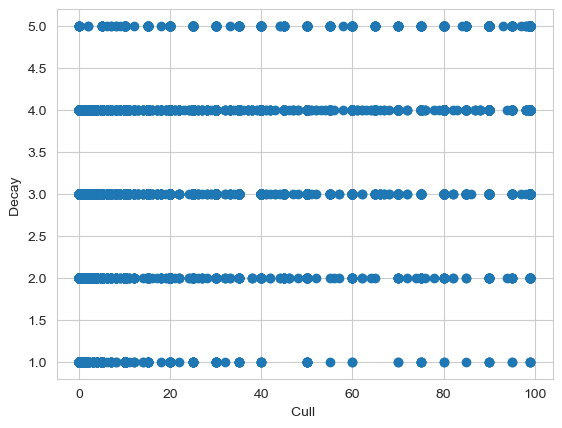

In [16]:
plt.scatter(wa_tree_data_damage['CULL'],wa_tree_data_damage['DECAYCD'])
plt.xlabel('Cull ')
plt.ylabel('Decay ')

plt.show()

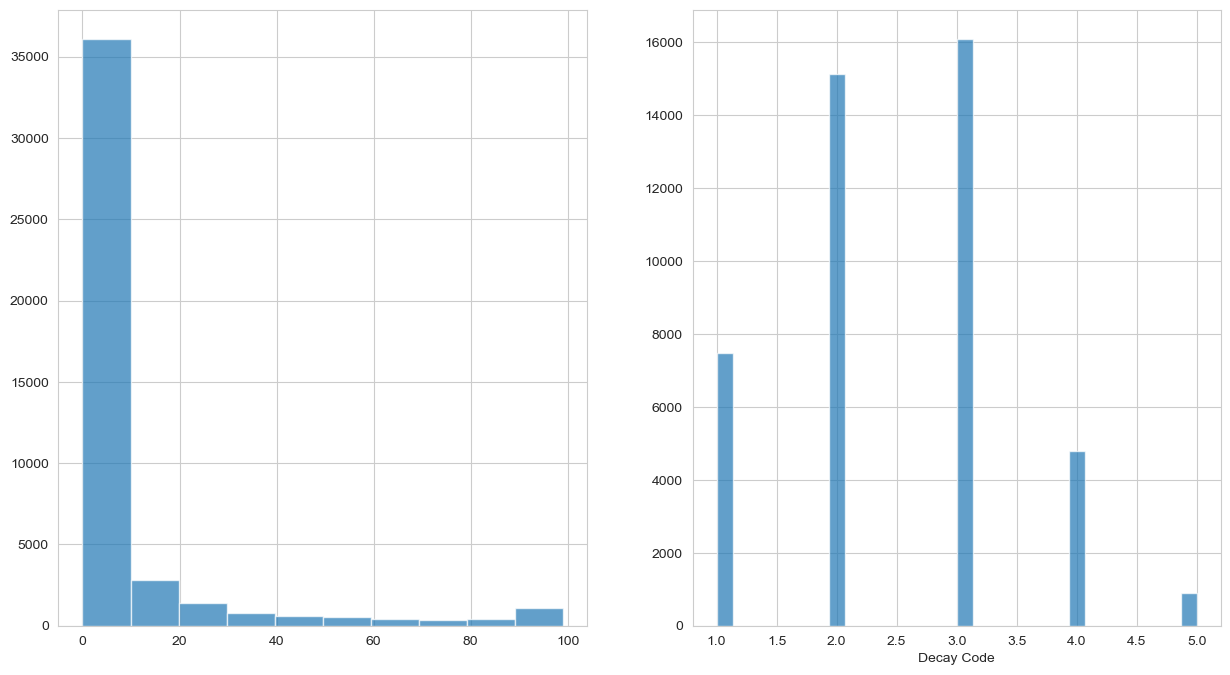

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax = np.ravel(ax)
ax[0].hist(wa_tree_data_damage['CULL'], bins=10, alpha=0.7) 
plt.xlabel('rotten and missing cull')

ax[1].hist(wa_tree_data_damage['DECAYCD'], bins=30, alpha=0.7) 
plt.xlabel('Decay Code')
plt.show()

It would be interesting comparing this damage data to the fire data we have.

In [12]:
trees_damage_fire= wa_tree_data[(wa_tree_data['DAMAGE_AGENT_CD1']==30000) | (wa_tree_data['DAMAGE_AGENT_CD2']==30000) |(wa_tree_data['DAMAGE_AGENT_CD3']==30000)]

In [13]:
trees_damage_fire.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1562 entries, 267343 to 504010
Columns: 197 entries, CN to PREV_HT_FLD
dtypes: float64(180), int64(13), object(4)
memory usage: 2.4+ MB


In [22]:
trees_damage_fire['INVYR'].head()

267343    2013
269357    2013
269359    2013
269360    2013
269380    2013
Name: INVYR, dtype: int64

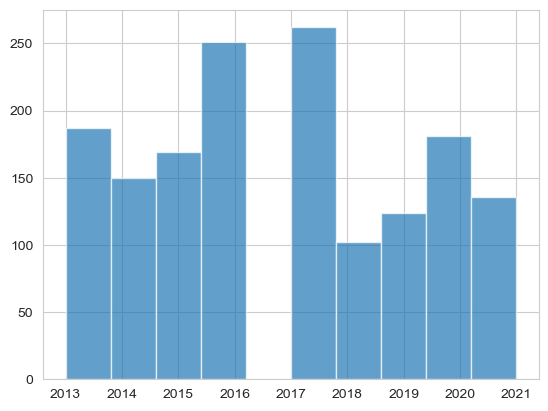

In [18]:
plt.hist(trees_damage_fire['INVYR'], bins=10, alpha=0.7) 
plt.show()

<class 'pandas.core.series.Series'>
RangeIndex: 22083 entries, 0 to 22082
Series name: MEASYEAR
Non-Null Count  Dtype
--------------  -----
22083 non-null  int64
dtypes: int64(1)
memory usage: 172.7 KB


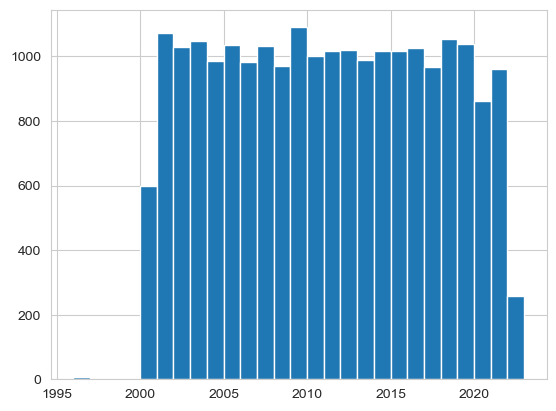

In [23]:


WP = pd.read_csv('../Data/WA_PLOT.csv')
WP.columns
WP['MEASYEAR'].info()
plt.hist(WP['MEASYEAR'],bins=27)
plt.show()

*IDEAS*

Once we can cross reference with fire data, we could look at how long the fire damage persists after a fire by referencing sampling dates IN 'MEASYEAR', 'MEASMO','MEASDAY', found in plot table as trees table does not have measyear.
Looks like measurements were done up until 2023



##### This is some Henry work
Here I am looking at when trees were taken inventory of.  I unzipped the WA_TREE.csv into the data folder.  On github it will still be zipped.  


In [34]:
WT = pd.read_csv('../Data/WA_TREE.csv')
WT.columns

/var/folders/mm/t_p68_6506v3jg0m1f58zkv40000gn/T/ipykernel_10025/655205258.py:1: DtypeWarning: Columns (77,159) have mixed types. Specify dtype option on import or set low_memory=False.
  WT = pd.read_csv('../Data/WA_TREE.csv')


Index(['CN', 'PLT_CN', 'PREV_TRE_CN', 'INVYR', 'STATECD', 'UNITCD', 'COUNTYCD',
       'PLOT', 'SUBP', 'TREE',
       ...
       'VOLCSNET_BARK', 'DRYBIO_STEM', 'DRYBIO_STEM_BARK', 'DRYBIO_STUMP_BARK',
       'DRYBIO_BOLE_BARK', 'DRYBIO_BRANCH', 'DRYBIO_FOLIAGE',
       'DRYBIO_SAWLOG_BARK', 'PREV_ACTUALHT_FLD', 'PREV_HT_FLD'],
      dtype='object', length=197)

In [35]:
WT.sample(2)

,CN,PLT_CN,PREV_TRE_CN,INVYR,STATECD,UNITCD,COUNTYCD,PLOT,SUBP,TREE,...,VOLCSNET_BARK,DRYBIO_STEM,DRYBIO_STEM_BARK,DRYBIO_STUMP_BARK,DRYBIO_BOLE_BARK,DRYBIO_BRANCH,DRYBIO_FOLIAGE,DRYBIO_SAWLOG_BARK,PREV_ACTUALHT_FLD,PREV_HT_FLD
169541,787916010497,29883003010497,NaN,2009,53,5,33,91825,2,529,...,3.148799,517.733261,47.001926,2.127263,44.245812,187.400307,60.158395,40.580877,NaN,NaN
121371,22413349010497,22399124010497,NaN,2006,53,9,19,72100,4,129,...,NaN,116.409005,8.892152,0.654663,7.491894,59.705561,30.954364,NaN,NaN,NaN


In [27]:
WT['PLT_CN'].nunique()
WT['CN']

101928       8613006010901
101929       8613007010901
101930       8613009010901
101931       8613012010901
101932       8613008010901
                ...       
504951    1287253101290487
504952    1287253102290487
504953    1287253103290487
504954    1287253104290487
504955    1287253105290487
Name: CN, Length: 224226, dtype: int64

This code combines the two years that one tree was measured along with the plot number that the tree sits in.  

In [85]:
years = np.zeros((len(WT),3))
for index,row in WT.iterrows():
    if not np.isnan(row.PREV_TRE_CN) and (row.INVYR != 0):
        oldrow = WT[WT['CN'] == row.PREV_TRE_CN]
        if not oldrow.empty:
            years[index,0] = oldrow.iloc[0].INVYR	
            years[index,1] = row.INVYR	
            years[index,2] = row.PLOT

years.shape

(504956, 3)

Getting rid of zeros.

(221447, 3)


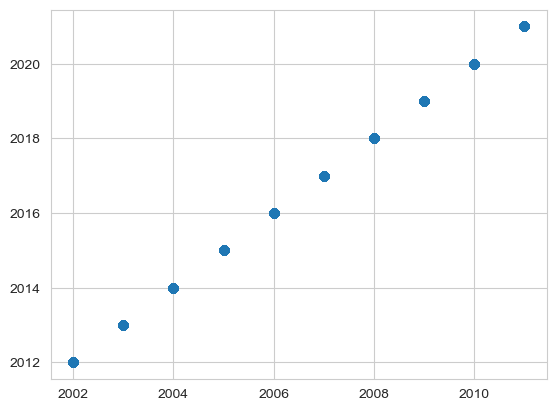

In [86]:
zeros = np.any(years == 0, axis = 1)
years = years[~zeros]
print(years.shape)
plt.scatter(years[:,0],years[:,1])
plt.show()


WOAH, This graph is showing that the inventory was taken every 10 years in waves of 2 years! -- very consistent

In [87]:
yearsdf = pd.DataFrame(years,columns = ['INVYR1','INVYR2','PLOT'])

PLOT = pd.read_csv('../Data/WA_PLOT.csv')
PLOT.columns

Index(['CN', 'SRV_CN', 'CTY_CN', 'PREV_PLT_CN', 'INVYR', 'STATECD', 'UNITCD',
       'COUNTYCD', 'PLOT', 'PLOT_STATUS_CD', 'PLOT_NONSAMPLE_REASN_CD',
       'MEASYEAR', 'MEASMON', 'MEASDAY', 'REMPER', 'KINDCD', 'DESIGNCD',
       'RDDISTCD', 'WATERCD', 'LAT', 'LON', 'ELEV', 'GROW_TYP_CD',
       'MORT_TYP_CD', 'P2PANEL', 'P3PANEL', 'ECOSUBCD', 'CONGCD', 'MANUAL',
       'KINDCD_NC', 'QA_STATUS', 'CREATED_DATE', 'MODIFIED_DATE',
       'MICROPLOT_LOC', 'DECLINATION', 'EMAP_HEX', 'SAMP_METHOD_CD',
       'SUBP_EXAMINE_CD', 'MACRO_BREAKPOINT_DIA', 'INTENSITY', 'CYCLE',
       'SUBCYCLE', 'ECO_UNIT_PNW', 'TOPO_POSITION_PNW',
       'NF_SAMPLING_STATUS_CD', 'NF_PLOT_STATUS_CD',
       'NF_PLOT_NONSAMPLE_REASN_CD', 'P2VEG_SAMPLING_STATUS_CD',
       'P2VEG_SAMPLING_LEVEL_DETAIL_CD', 'INVASIVE_SAMPLING_STATUS_CD',
       'INVASIVE_SPECIMEN_RULE_CD', 'DESIGNCD_P2A', 'MANUAL_DB', 'SUBPANEL',
       'CONDCHNGCD_RMRS', 'FUTFORCD_RMRS', 'MANUAL_NCRS', 'MANUAL_NERS',
       'MANUAL_RMRS', 'PAC_ISLA

In [89]:
TREEPLOTS = PLOT[PLOT['PLOT'].isin(yearsdf['PLOT'])]

In [90]:
fig = px.scatter_mapbox(TREEPLOTS, lat='LAT', lon='LON',zoom=5,mapbox_style="open-street-map")

fig.update_traces(marker = dict(size = 2))

fig.update_layout(
    mapbox_center={"lat": 47.5, "lon": -120.0},  # Center on Washington
)

fig.show()

These are the plots where these trees that have been measured multiple times are located.  We have 221447 trees that have been measured multiple times in a wide geographic range of plots.  This is great.  